<a href="https://colab.research.google.com/github/anhntb/DS102_ML/blob/main/B%C3%A0i_t%E1%BA%ADp_t%E1%BB%95ng_h%E1%BB%A3p_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Bộ dữ liệu mô phỏng về chi tiêu kỳ nghỉ của 26 khách hàng.
# Observation: số thứ tự được gán cho mỗi khách hàng, từ 1 đến 26
# Age: tuổi của khách hàng (tính bằng năm)
# Expenditures: chi tiêu trung bình hàng ngày trong kỳ nghỉ
df_1 = pd.DataFrame({
    "Observation": list(range(1, 27)),
    "Age": [49, 15, 43, 45, 40, 35, 42, 38, 46, 30, 52, 55, 42, 25, 35, 35, 35, 27, 48, 37, 45, 19, 57, 55, 34, 39],
    "Expenditures": [95, 104, 91, 98, 94, 107, 96, 108, 98, 108, 101, 89, 96, 105, 107, 106, 105, 105, 97, 109, 94, 103, 103, 94, 108, 108]
})
print(df_1.to_string(index=False))

 Observation  Age  Expenditures
           1   49            95
           2   15           104
           3   43            91
           4   45            98
           5   40            94
           6   35           107
           7   42            96
           8   38           108
           9   46            98
          10   30           108
          11   52           101
          12   55            89
          13   42            96
          14   25           105
          15   35           107
          16   35           106
          17   35           105
          18   27           105
          19   48            97
          20   37           109
          21   45            94
          22   19           103
          23   57           103
          24   55            94
          25   34           108
          26   39           108


#### Bài tập 1:

#### Bộ dữ liệu `df_1` là một bộ dữ liệu mô phỏng về chi tiêu kỳ nghỉ của 26 khách hàng. Bộ dữ liệu bao gồm các quan sát về tuổi của khách hàng và chi tiêu trung bình hàng ngày trong kỳ nghỉ.

(a) Vẽ hai biểu đồ `histogram`, một cho "chi tiêu" (`Expenditures`) và một cho "tuổi" (`Age`). Đồng thời, tạo biểu đồ phân tán (`scatter diagram`) với "chi tiêu" trên trục tung và "tuổi" trên trục hoành.

(b) Đề xuất một phương pháp phân tích bộ dữ liệu này để hỗ trợ công ty du lịch đưa ra các đề xuất phù hợp cho khách hàng trong tương lai.

#### Biểu đồ phân tán có thể chỉ ra sự khác biệt giữa các nhóm khách hàng. Nhóm khách hàng trẻ tuổi có thể chi tiêu nhiều hơn so với nhóm khách hàng lớn tuổi. Chi tiêu có xu hướng tăng theo độ tuổi đối với nhóm khách hàng trẻ, trong khi xu hướng này ít rõ ràng hơn đối với nhóm khách hàng lớn tuổi.

(c) Tính giá trị trung bình mẫu của "chi tiêu" của tất cả 26 khách hàng.

(d) Tính hai giá trị trung bình mẫu của "chi tiêu": một cho nhóm khách hàng có độ tuổi từ 40 trở lên và một cho nhóm khách hàng có độ tuổi dưới 40.

(e) Bạn sẽ dự đoán chi tiêu hàng ngày cho một khách hàng mới 50 tuổi là bao nhiêu? Và cho một khách hàng 25 tuổi thì sao?

**Câu a**

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

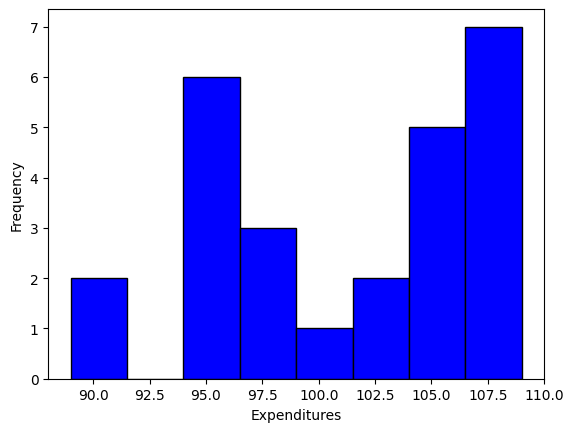

In [ ]:
# Histogram cho chi tiêu
plt.hist(df_1["Expenditures"], bins=8, color='blue', edgecolor='black')
plt.xlabel("Expenditures")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

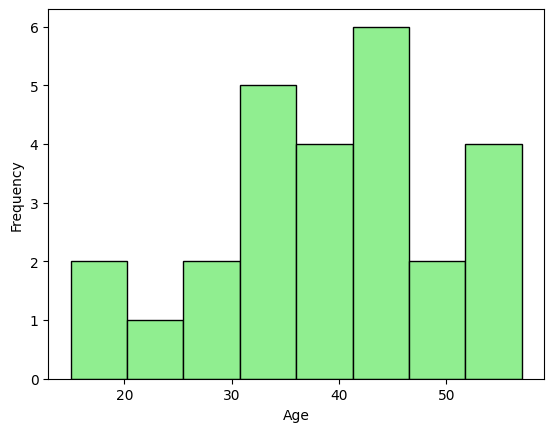

In [ ]:
# Histogram cho tuổi
plt.hist(df_1["Age"], bins=8, color='lightgreen', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Expenditures')

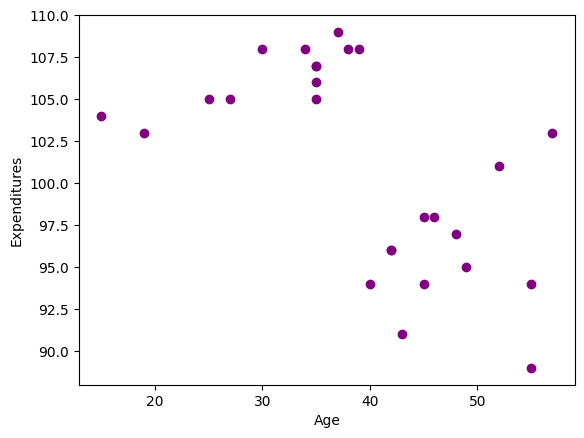

In [ ]:
# Biểu đồ phân tán (scatter diagram) với "chi tiêu" trên trục tung và "tuổi" trên trục hoành
plt.scatter(df_1["Age"], df_1["Expenditures"], color='purple')
plt.xlabel("Age")
plt.ylabel("Expenditures")

**Câu b:** Phương pháp phân tích bộ dữ liệu này để hỗ trợ công ty du lịch đưa ra các đề xuất phù hợp cho khách hàng:

Phân tích hồi quy (Regression Analysis)
* Kiểm tra xem có mối quan hệ giữa độ tuổi và chi tiêu hay không, giúp dự đoán chi tiêu trung bình hàng ngày của khách hàng dựa vào độ tuổi.
* Biết được hệ số hồi quy, giao điểm với trục tung, và các chỉ số đánh giá mô hình. Đường hồi quy sẽ cho thấy xu hướng chung về mối quan hệ giữa tuổi và chi tiêu.

In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Hệ số hồi quy (Slope): -0.33359609660627654
Intercept (Giao điểm với trục tung): 114.24110795493158
Hệ số xác định R²: 0.3376682003876883
Mean Squared Error (MSE): 23.75870385917004


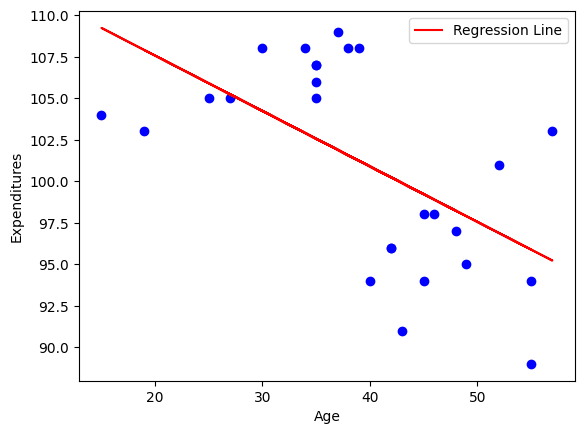

In [ ]:
X = df_1["Age"].values.reshape(-1, 1)  # Biến độc lập (tuổi)
y = df_1["Expenditures"].values        # Biến phụ thuộc (chi tiêu)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Dự đoán chi tiêu dựa trên tuổi
y_pred = model.predict(X)

# Tính các chỉ số đánh giá mô hình
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Hệ số hồi quy (Slope): {model.coef_[0]}")
print(f"Intercept (Giao điểm với trục tung): {model.intercept_}")
print(f"Hệ số xác định R²: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

# Biểu đồ phân tán và đường hồi quy
plt.scatter(df_1["Age"], df_1["Expenditures"], color='blue')
plt.plot(df_1["Age"], y_pred, color='red', label="Regression Line")
plt.xlabel("Age")
plt.ylabel("Expenditures")
plt.legend()
plt.show()

**Câu c**

In [ ]:
# Giá trị trung bình mẫu của "chi tiêu"
mean_expenditures = df_1["Expenditures"].mean()
mean_expenditures

101.11538461538461

**Câu d**

In [ ]:
# Chia bộ dữ liệu thành hai nhóm: khách hàng từ 40 tuổi trở lên và dưới 40 tuổi
group_age_40_and_above = df_1[df_1["Age"] >= 40]
group_age_below_40 = df_1[df_1["Age"] < 40]

# Tính giá trị trung bình mẫu của "chi tiêu" cho từng nhóm
mean_expenditures_40_and_above = group_age_40_and_above["Expenditures"].mean()
mean_expenditures_below_40 = group_age_below_40["Expenditures"].mean()

mean_expenditures_40_and_above, mean_expenditures_below_40

(95.84615384615384, 106.38461538461539)

**Câu e** Bạn sẽ dự đoán chi tiêu hàng ngày cho một khách hàng mới 50 tuổi là bao nhiêu? Và cho một khách hàng 25 tuổi thì sao?

In [ ]:
age_50 = 50
age_25 = 25

# Sử dụng mô hình để dự đoán
expenditure_50 = model.coef_[0] * age_50 + model.intercept_
expenditure_25 = model.coef_[0] * age_25 + model.intercept_

expenditure_50, expenditure_25

(97.56130312461775, 105.90120553977466)

#### Bài tập 2:

#### Một phép biến đổi dữ liệu của $x_i$ và $y_i$ (như việc lấy logarit) sẽ thay đổi cách diễn giải của tham số độ dốc $\beta$.

(a) Chứng minh rằng trong mô hình hồi quy $\log(y_i) = \alpha + \beta \log(x_i) + \varepsilon_i$, độ co giãn (elasticity) của $y$ đối với $x$ bằng $\beta$ (tức là, không phụ thuộc vào giá trị của $x_i$ và $y_i$).

(b) Xác định độ co giãn của $y$ đối với $x$ trong mô hình $y_i = \alpha + \beta \log(x_i) + \varepsilon_i$.

(c) Xác định độ co giãn của $y$ đối với $x$ trong mô hình $\log(y_i) = \alpha + \beta x_i + \varepsilon_i$.

**Lưu ý**:
Như trong phần lớn các môn học, `log` viết tắt cho `logarit` tự nhiên, với cơ số $e \approx 2.71828$. Trên máy tính, thường được viết là $\ln(x)$, nhưng chúng ta sử dụng ký hiệu $\log(x)$. Đạo hàm của $\log(x)$, với cơ số $e$, là $1/x$.

#### Công thức tính độ co giãn:
$$
\text{elasticity} = \frac{\partial y_i}{\partial x_i} \times \frac{x_i}{y_i}
$$
Trong đó:
- $\frac{\partial y_i}{\partial x_i}$ là đạo hàm của $y_i$ theo $x_i$, biểu thị sự thay đổi của $y$ khi $x$ thay đổi.
- $\frac{x_i}{y_i}$ là tỷ lệ của $x_i$ với $y_i$.

#### Ví dụ về độ co giãn:
- $x_i = 20$ (nghìn đồng), $y_i = 500$ (triệu đồng)
- $\frac{\partial y_i}{\partial x_i} = -10$ (doanh thu giảm 10 triệu đồng khi giá tăng 1 nghìn đồng)

Tính độ co giãn:

$$
\text{elasticity} = \frac{\partial y_i}{\partial x_i} \times \frac{x_i}{y_i} = -10 \times \frac{20}{500} = -0.4
$$

Kết quả: Độ co giãn là $-0.4$, nghĩa là khi giá tăng 1%, doanh thu giảm 0.4%.

**Câu a**  
Đạo hàm của y theo x. Từ phương trình hồi quy, ta có:  
log(yi) = α + β log(xi) + εi  

Khử logarit hai vế, ta được:  
yi = e^(α + β log(xi) + εi)

Sử dụng quy tắc đạo hàm của hàm hợp, ta tính đạo hàm của yi theo xi:

dyi/dxi = β * e^(α + β log(xi) + εi) / xi

**Chứng minh:**  
Elasticity = (dyi/dxi) * (xi/yi)  

Thay giá trị của dyi/dxi vào công thức trên, ta có:

Elasticity = (β * e^(α + β log(xi) + εi) / xi) * (xi / e^(α + β log(xi) + εi))

Rút gọn biểu thức, ta được:

Elasticity = β

**Câu b**  
Elasticity = (dyi/dxi) * (xi/yi)

Thay giá trị của dyi/dxi ở câu a vào công thức trên, ta có:

Elasticity = (β * e^(α + β log(xi) + εi) / xi) * (xi / e^(α + β log(xi) + εi))

Rút gọn biểu thức, ta được:

Elasticity = β

Độ co giãn của y đối với x trong mô hình yi = α + β log(xi) + εi bằng β / yi.

**Câu c**

Elasticity = (dyi/dxi) * (xi/yi)

Thay giá trị của dyi/dxi vào công thức trên, ta có:

Elasticity = (β * e^(α + βxi + εi)) * (xi / e^(α + βxi + εi))

Rút gọn biểu thức, ta được:

Elasticity = βxi

Độ co giãn của y đối với x trong mô hình log(yi) = α + βxi + εi bằng βxi.

In [ ]:
# Thời gian về đích ở nội dung điền kinh 100 mét dành cho nam tại Thế vận hội Olympic từ 1948-2004.
# Game: số thứ tự của kỳ Thế vận hội (1-15)
# Year: năm diễn ra Thế vận hội Olympic (1948-2004)
# Winning time men: thời gian về đích ở nội dung điền kinh 100 mét dành cho nam (tính bằng giây)
df_2 = pd.DataFrame({
    "Game": list(range(1, 16)),
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004],
    "Winning time men": [10.3, 10.4, 10.5, 10.2, 10.0, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85]
})
print(df_2.to_string(index=False))

 Game  Year  Winning time men
    1  1948             10.30
    2  1952             10.40
    3  1956             10.50
    4  1960             10.20
    5  1964             10.00
    6  1968              9.95
    7  1972             10.14
    8  1976             10.06
    9  1980             10.25
   10  1984              9.99
   11  1988              9.92
   12  1992              9.96
   13  1996              9.84
   14  2000              9.87
   15  2004              9.85


#### Bài tập 3:

#### Bộ dữ liệu `df_2` chứa thời gian về đích ở nội dung điền kinh 100 mét dành cho nam tại Thế vận hội Olympic từ năm 1948 đến 2004. Các năm từ 1948-2004 được chuyển đổi thành số thứ tự của kỳ Thế vận hội (Game) từ 1 đến 15 để đơn giản hóa việc tính toán. Một mô hình hồi quy đơn giản cho xu hướng trong thời gian về đích được thể hiện bằng: $W_i = \alpha + \beta G_i + \varepsilon_i$, trong đó $W_i$ là "thời gian về đích" và $G_i$ là số thứ tự của kỳ Thế vận hội.

(a) Tính toán $a$ và $b$ (hệ số hồi quy), và xác định giá trị của $R^2$ và $s$ (độ lệch chuẩn của sai số).

(b) Bạn có tự tin vào khả năng dự đoán của mô hình này không? Hãy giải thích lý do.

(c) Dự đoán thời gian về đích cho các năm 2008, 2012, và 2016. So sánh dự đoán của bạn với thời gian về đích thực tế nếu có.

**Câu a**

In [ ]:
import statsmodels.api as sm

# Tính toán hồi quy tuyến tính
X = df_2["Game"]
X = sm.add_constant(X)  # Thêm hằng số cho mô hình hồi quy
y = df_2["Winning time men"]
model = sm.OLS(y, X).fit()

# Trích xuất hệ số hồi quy, R^2, và độ lệch chuẩn của sai số
a, b = model.params
R2 = model.rsquared
s = model.resid.std()

a, b, R2, s


(10.386000000000005,
 -0.03799999999999992,
 0.6733728599027389,
 0.11835781101630517)

**Câu b**

Mô hình cho thấy một xu hướng giảm dần trong thời gian về đích, nhưng mức độ giải thích của mô hình chưa đủ cao để khẳng định rằng mô hình có khả năng dự đoán mạnh mẽ.

Đánh giá dựa trên một số yếu tố:

* R² (hệ số xác định): R² = 0.6734 cho thấy mô hình chỉ giải thích được 67.34% sự biến thiên trong thời gian về đích. Điều này có nghĩa là khoảng 32.66% sự biến thiên không được giải thích bởi số thứ tự của kỳ Thế vận hội và có thể do các yếu tố khác không được đưa vào mô hình, như điều kiện thời tiết, sự tiến bộ trong công nghệ thể thao, hoặc những thay đổi trong kỹ thuật huấn luyện.

* Độ lệch chuẩn của sai số (s): Độ lệch chuẩn của sai số là 0.1184 giây, một con số không quá lớn nhưng cũng cho thấy rằng dự đoán từ mô hình có thể không hoàn toàn chính xác. Trong môn điền kinh 100 mét, sự khác biệt nhỏ có thể là đáng kể khi đánh giá thành tích vận động viên.

**Câu c**

In [ ]:
# Sử dụng mô hình để dự đoán thời gian về đích cho các năm 2008, 2012, và 2016
# Tính số thứ tự của kỳ Thế vận hội tương ứng
games_to_predict = [16, 17, 18]  # 2008 -> 16th, 2012 -> 17th, 2016 -> 18th
predicted_times = a + b * pd.Series(games_to_predict)

# Thời gian về đích thực tế
actual_times = {
    2008: 9.69,  # Usain Bolt, 2008
    2012: 9.63,  # Usain Bolt, 2012
    2016: 9.81   # Usain Bolt, 2016
}

predicted_times.tolist(), actual_times

([9.778000000000006, 9.740000000000006, 9.702000000000005],
 {2008: 9.69, 2012: 9.63, 2016: 9.81})

Thời gian về đích thực tế:

2008: 9.69 giây (Usain Bolt)

2012: 9.63 giây (Usain Bolt)

2016: 9.81 giây (Usain Bolt)

So sánh

2008: Dự đoán là 9.778 giây, cao hơn thời gian thực tế là 9.69 giây.Sai lệch: 0.088 giây.

2012: Dự đoán là 9.74 giây, cao hơn thời gian thực tế là 9.63 giây. Sai lệch: 0.11 giây.

2016: Dự đoán là 9.702 giây, thấp hơn thời gian thực tế là 9.81 giây. Sai lệch: 0.108 giây.

#### Bài tập 4:

#### Xét tình huống biến số $x$ được quan sát với sai số đo lường (measurement error), điều này khá phổ biến đối với các biến kinh tế vĩ mô phức tạp như thu nhập quốc dân.

#### Giả sử $x^*$ là biến kinh tế thực sự nhưng không được quan sát, và quá trình tạo dữ liệu được cho bởi $y_i = \alpha + \beta x_i^* + \varepsilon_i^*$, trong đó $x_i^*$ và $\varepsilon_i^*$ không tương quan.

#### Các giá trị $x$ quan sát được là $x_i = x_i^* + v_i$, với sai số đo lường $v_i$ không tương quan với $x_i^*$ và $\varepsilon_i^*$. Tỷ lệ tín hiệu trên nhiễu (signal-to-noise ratio) được định nghĩa là $SN = \frac{\sigma_{x^*}^2}{\sigma_v^2}$, trong đó $\sigma_{x^*}^2$ là phương sai (variance) của $x^*$ và $\sigma_v^2$ là phương sai của $v$.

#### Mô hình hồi quy ước lượng là $y_i = \alpha + \beta x_i + \varepsilon_i$, và chúng ta xem xét ước lượng bình phương tối thiểu $b$ của $\beta$ ($b$ là ước lượng, $\beta$ là hệ số thực).

(a) Bạn có nghĩ rằng giá trị của $b$ phụ thuộc vào phương sai của sai số đo lường không? Tại sao?

(b) Chứng minh rằng $b = \beta + \frac{\sum_{i=1}^{n}(x_i - \bar{x})(\varepsilon_i - \bar{\varepsilon})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$.

(c) Chứng minh rằng $\varepsilon_i = \varepsilon_i^* - \beta v_i$.

(d) Chứng minh rằng hiệp phương sai (covariance) giữa $x_i$ và $\varepsilon_i$ bằng $- \beta \sigma_v^2$.

(e) Chứng minh rằng với cỡ mẫu lớn $n$, ta có $b - \beta \approx - \beta \frac{\sigma_v^2}{\sigma_{x^*}^2 + \sigma_v^2}$.

(f) Tính xấp xỉ độ chệch (bias) $b - \beta$ cho $\beta = 1$ trong các trường hợp $SN = 1$, $SN = 3$, và $SN = 10$.

**Câu a**

Đúng. Vì giá trị của b sẽ phụ thuộc vào phương sai của sai số đo lường (σv²). Khi phương sai của sai số đo lường càng lớn, nghĩa là độ chính xác của biến x quan sát được càng thấp, điều này sẽ làm giảm độ tin cậy của ước lượng b. Nếu sai số đo lường lớn, chúng ta sẽ khó phân biệt được ảnh hưởng thực sự của x* lên y so với ảnh hưởng của sai số v.

**Câu b**

Thay xi* bằng xi - vi, ta có:

yi = α + β(xi - vi) + εi

yi = α + βxi - βvi + εi


Đặt ui = βvi + εi -> Mô hình trở thành:

yi = α + βxi + ui


Ước lượng bằng phương pháp bình phương tối thiểu:

Giá trị của b sao cho tổng bình phương các sai số (residuals) là nhỏ nhất.

Sai số: ui = yi - (α + βxi).

Tổng bình phương các sai số là: SSR = Σui² = Σ(yi - α - βxi)²


Giá trị của b làm cho SSR nhỏ nhất -> đạo hàm một phần của SSR theo b và cho bằng 0: ∂SSR/∂b = -2Σxi(yi - α - βxi) = 0

Từ phương trình trên, ta có: Σxiyi - αΣxi - βΣxi² = 0

Chia cả hai vế cho Σ(xi-x̄)²:

Σ(xi-x̄)(yi-ȳ) / Σ(xi-x̄)² = β + Σ(xi-x̄)ui / Σ(xi-x̄)²

Thay ui bằng βvi + εi:

β + Σ(xi-x̄)ui / Σ(xi-x̄)² = β + Σ(xi-x̄)(βvi + εi) / Σ(xi-x̄)²

= β + βΣ(xi-x̄)vi / Σ(xi-x̄)² + Σ(xi-x̄)εi / Σ(xi-x̄)²

= β + Σ(xi-x̄)εi / Σ(xi-x̄)²  
(vì Σ(xi-x̄)vi = 0, do vi là sai số có trung bình bằng 0)

**Câu d**

Mô hình hồi quy:

yi = α + βxi* + εi

xi* là giá trị thực của biến giải thích

xi = xi* + vi là giá trị quan sát được của biến giải thích (với vi là sai số đo lường)

ui = βvi + εi

Tính hiệp phương sai:

Cov(xi, εi) = E[(xi - E(xi))(εi - E(εi))]

Vì E(εi) = 0, nên ta có:

Cov(xi, εi) = E[xiεi]

Thay xi = xi* + vi vào, ta được:

Cov(xi, εi) = E[(xi* + vi)εi] = E(xi*εi) + E(viεi)

Phân tích từng thành phần:

* Vì xi là giá trị thực và không phụ thuộc vào sai số ngẫu nhiên εi, nên E(xiεi) = xiE(εi) = 0.

* Ta có: E(viεi) = E(vi(ui - βvi))

= E(viui) - βE(vi²) = Cov(vi, ui) - βVar(vi)

= Cov(vi, βvi + εi) - βσv² = βCov(vi, vi) + Cov(vi, εi) - βσv²

= βσv² + 0 - βσv² (vì vi và εi không tương quan) = 0

Vậy Cov(xi, εi) = 0 + 0 - βσv² = -βσv².




In [ ]:
# Thời gian về đích ở nội dung điền kinh 100 mét dành cho nam và nữ tại Thế vận hội Olympic từ 1948-2004.
# Game: số thứ tự của kỳ Thế vận hội (1-15)
# Year: năm diễn ra Thế vận hội Olympic (1948-2004)
# Winning time men: thời gian về đích ở nội dung điền kinh 100 mét dành cho nam (tính bằng giây)
# Winning time women: thời gian về đích ở nội dung điền kinh 100 mét dành cho nữ (tính bằng giây)
df_3 = pd.DataFrame({
    "Game": list(range(1, 16)),
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004],
    "Winning time men": [10.3, 10.4, 10.5, 10.2, 10.0, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85],
    "Winning time women": [11.9, 11.5, 11.5, 11.0, 11.4, 11.08, 11.07, 11.08, 11.06, 10.97, 10.54, 10.82, 10.94, 10.75, 10.93]
})
print(df_3.to_string(index=False))

 Game  Year  Winning time men  Winning time women
    1  1948             10.30               11.90
    2  1952             10.40               11.50
    3  1956             10.50               11.50
    4  1960             10.20               11.00
    5  1964             10.00               11.40
    6  1968              9.95               11.08
    7  1972             10.14               11.07
    8  1976             10.06               11.08
    9  1980             10.25               11.06
   10  1984              9.99               10.97
   11  1988              9.92               10.54
   12  1992              9.96               10.82
   13  1996              9.84               10.94
   14  2000              9.87               10.75
   15  2004              9.85               10.93


#### Bài tập 5:

#### Bộ dữ liệu `df_3` chứa thời gian về đích ở nội dung điền kinh 100 mét dành cho nam và nữ tại Thế vận hội Olympic từ năm 1948 đến 2004. Dữ liệu bao gồm thời gian về đích của các vận động viên qua các kỳ Thế vận hội (1-15) trong giai đoạn này.

(a) Sử dụng một mô hình hồi quy tuyến tính với công thức $y_{\text{men}} = a_1 \times \text{Year} + b_1$ cho nam và $y_{\text{women}} = a_2 \times \text{Year} + b_2$ cho nữ. Dự đoán khi nào thời gian về đích của nam và nữ sẽ bằng nhau. Chứng minh rằng mô hình dự đoán thời gian về đích bằng nhau vào khoảng năm 2140.

(b) Sử dụng một mô hình hồi quy phi tuyến với hàm `log` theo công thức $\log(y_{\text{men}}) = a_3 \times \text{Year} + b_3$ cho nam và $\log(y_{\text{women}}) = a_4 \times \text{Year} + b_4$ cho nữ. Dự đoán khi nào thời gian về đích của nam và nữ sẽ bằng nhau. Chứng minh rằng mô hình này dự đoán thời gian bằng nhau vào khoảng năm 2192.

(c) Chứng minh rằng mô hình hồi quy tuyến tính dự đoán thời gian về đích bằng nhau ở mức xấp xỉ 8.53 giây.

(d) Đưa ra nhận xét về những kết quả này và mô hình hồi quy được sử dụng. Bạn có nghĩ rằng dự đoán của các mô hình này đáng tin cậy cho tương lai xa không? Tại sao?